# -------------------------------------------------------
### Hi, My name is Ahmed Sherif.

### I am a data scientist working at Convergence Consulting Group.

### You can follow me on twitter at @TheAhmedSherif

### or

### You can email me at asherif@ccgbi.com
# -------------------------------------------------------

![alt text](headshot.jpg "Big Headshot!")

## One of the best ways to understand the foundation of neural networks is to build a model from scratch without any of the popular deep learning libraries. 

## Once the foundation for a neural network framework is established, understanding and utilizing some of the more popular deep neural network libraries will become much simpler.

![alt text](ANN_sample.png
"Big Headshot!")

# Here is the agenda for today
# --------------------------------

## 1 Creating a DataFrame of data to predict

## 2 Converting DataFrame to array

## 3 Visualizing array in scatterplot

## 4 Setting up weights and biases for input into neural network

## 5 Normalizing the input data for the neural network

## 6 Setting up the activation function with sigmoid

## 7 Calculating the cost function in a neural network

## 8 Predicting gender based on height and weight


# Let's Get Started!

# Creating a DataFrame of data to predict

In [1]:
import pandas as pd

df = pd.DataFrame(columns=['gender', 'height','weight'], data=[
                            ('Male', 67, 150),
                            ('Female', 65, 135),
                            ('Female', 68, 130),
                            ('Male', 70, 160),
                            ('Female', 70, 130),
                            ('Male', 69, 174),
                            ('Female', 65, 126),
                            ('Male', 74, 188),
                            ('Female', 60, 110),
                            ('Female', 63, 125),
                            ('Male', 70, 173),
                            ('Male', 70, 145),
                            ('Male', 68, 175),
                            ('Female', 65, 123),
                            ('Male', 71, 145),
                            ('Male', 74, 160),
                            ('Female', 64, 135),
                            ('Male', 71, 175),
                            ('Male', 67, 145),
                            ('Female', 67, 130),
                            ('Male', 70, 162),
                            ('Female', 64, 107),
                            ('Male', 70, 175),
                            ('Female', 64, 130),
                            ('Male', 66, 163),
                            ('Female', 63, 137),
                            ('Male', 65, 165),
                            ('Female', 65, 130),
                            ('Female', 64, 109)])

In [2]:
df.head()

,gender,height,weight
0,Male,67,150
1,Female,65,135
2,Female,68,130
3,Male,70,160
4,Female,70,130


In [3]:
df = df[['height', 'weight', 'gender']]

In [4]:
df.head()

,height,weight,gender
0,67,150,Male
1,65,135,Female
2,68,130,Female
3,70,160,Male
4,70,130,Female


In [5]:
df['gender'] = df['gender'].apply(lambda x: 1 if x =='Male' else 0) 

In [6]:
df.head()

,height,weight,gender
0,67,150,1
1,65,135,0
2,68,130,0
3,70,160,1
4,70,130,0


# Almost all of the work needed to build a neural network requires 2 things:
## 1 Linear Algebra -- Arrays
## 2 Calculus -- Derivatives

# Converting DataFrame to array

In [7]:
import numpy as np
data_array = df.as_matrix()

In [8]:
data_array

array([[ 67, 150,   1],
       [ 65, 135,   0],
       [ 68, 130,   0],
       [ 70, 160,   1],
       [ 70, 130,   0],
       [ 69, 174,   1],
       [ 65, 126,   0],
       [ 74, 188,   1],
       [ 60, 110,   0],
       [ 63, 125,   0],
       [ 70, 173,   1],
       [ 70, 145,   1],
       [ 68, 175,   1],
       [ 65, 123,   0],
       [ 71, 145,   1],
       [ 74, 160,   1],
       [ 64, 135,   0],
       [ 71, 175,   1],
       [ 67, 145,   1],
       [ 67, 130,   0],
       [ 70, 162,   1],
       [ 64, 107,   0],
       [ 70, 175,   1],
       [ 64, 130,   0],
       [ 66, 163,   1],
       [ 63, 137,   0],
       [ 65, 165,   1],
       [ 65, 130,   0],
       [ 64, 109,   0]])

In [9]:
data_array.shape

(29, 3)

In [10]:
data_array[0]

array([ 67, 150,   1])

In [11]:
data_array[28]

array([ 64, 109,   0])

In [12]:
print(data_array.max(axis=0))
print(data_array.min(axis=0))
print(data_array.mean(axis=0))
print(data_array.std(axis=0))

[ 74 188   1]
[ 60 107   0]
[  67.20689655  145.24137931    0.51724138]
[  3.35671545  22.1743175    0.49970265]


# Visualizing array in scatterplot

![alt text](1000words.jpg "Big Headshot!")

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

### Pull down some values for the grid size of the plot

In [14]:
min_x = data_array.min(axis=0)[0]-10
max_x = data_array.max(axis=0)[0]+10
min_y = data_array.min(axis=0)[1]-10
max_y = data_array.max(axis=0)[1]+10

print(min_x, max_x, min_y, max_y)

50 84 97 198


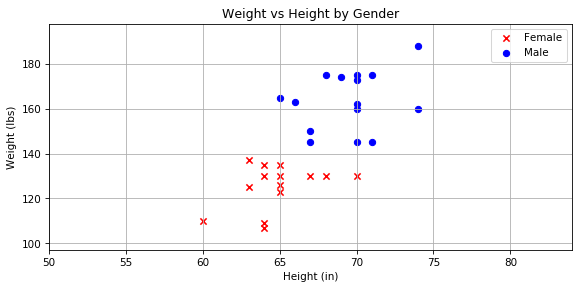

In [15]:
# formatting the plot grid, scales, and figure size
plt.figure(figsize=(9, 4), dpi= 75)
plt.axis([min_x,max_x,min_y,max_y])
plt.grid()
for i in range(len(data_array)):
    value = data_array[i]
    # assign labels values to specific matrix elements
    gender = value[2]
    height = value[0]
    weight = value[1]
    
    # filter data points by gender
    a = plt.scatter(height[gender==0],weight[gender==0], marker = 'x', c= 'r', label = 'Female')
    b = plt.scatter(height[gender==1],weight[gender==1], marker = 'o', c= 'b', label = 'Male')
    
    # plot values, title, legend, x and y axis
    plt.title('Weight vs Height by Gender')
    plt.xlabel('Height (in)')
    plt.ylabel('Weight (lbs)')
    plt.legend(handles=[a,b])

# Setting up weights and biases for input into neural network

![alt text](CH0319.png "Title")

In [16]:
np.random.seed(12345)

In [17]:
w1 = np.random.randn()
w2 = np.random.randn()
b= np.random.randn()

In [18]:
print(w1, w2, b)

-0.20470765948471295 0.47894333805754824 -0.5194387150567381


# Normalizing the input data for the neural network

In [19]:
X = data_array[:,:2]
y = data_array[:,2]
print(X)
print(y)

[[ 67 150]
 [ 65 135]
 [ 68 130]
 [ 70 160]
 [ 70 130]
 [ 69 174]
 [ 65 126]
 [ 74 188]
 [ 60 110]
 [ 63 125]
 [ 70 173]
 [ 70 145]
 [ 68 175]
 [ 65 123]
 [ 71 145]
 [ 74 160]
 [ 64 135]
 [ 71 175]
 [ 67 145]
 [ 67 130]
 [ 70 162]
 [ 64 107]
 [ 70 175]
 [ 64 130]
 [ 66 163]
 [ 63 137]
 [ 65 165]
 [ 65 130]
 [ 64 109]]
[1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0]


In [20]:
x_mean = X.mean(axis=0)
x_std = X.std(axis=0)
print(x_mean, x_std)

[  67.20689655  145.24137931] [  3.35671545  22.1743175 ]


In [21]:
def normalize(X):
    x_mean = X.mean(axis=0)
    x_std = X.std(axis=0)
    X = (X - X.mean(axis=0))/X.std(axis=0)
    return X

In [22]:
X = normalize(X)
print(X)

[[-0.06163661  0.21460055]
 [-0.65745714 -0.4618577 ]
 [ 0.23627366 -0.68734378]
 [ 0.8320942   0.66557271]
 [ 0.8320942  -0.68734378]
 [ 0.53418393  1.29693375]
 [-0.65745714 -0.86773265]
 [ 2.02373527  1.92829478]
 [-2.14700848 -1.58928812]
 [-1.25327768 -0.91282987]
 [ 0.8320942   1.25183653]
 [ 0.8320942  -0.01088554]
 [ 0.23627366  1.34203096]
 [-0.65745714 -1.0030243 ]
 [ 1.13000446 -0.01088554]
 [ 2.02373527  0.66557271]
 [-0.95536741 -0.4618577 ]
 [ 1.13000446  1.34203096]
 [-0.06163661 -0.01088554]
 [-0.06163661 -0.68734378]
 [ 0.8320942   0.75576715]
 [-0.95536741 -1.72457977]
 [ 0.8320942   1.34203096]
 [-0.95536741 -0.68734378]
 [-0.35954687  0.80086436]
 [-1.25327768 -0.37166327]
 [-0.65745714  0.8910588 ]
 [-0.65745714 -0.68734378]
 [-0.95536741 -1.63438533]]


In [23]:
print('standard deviation')
print(round(X[:,0].std(axis=0),0))
print('mean')
print(round(X[:,0].mean(axis=0),0))

standard deviation
1.0
mean
-0.0


In [24]:
data_array = np.column_stack((X[:,0], X[:,1],y))
print(data_array)

[[-0.06163661  0.21460055  1.        ]
 [-0.65745714 -0.4618577   0.        ]
 [ 0.23627366 -0.68734378  0.        ]
 [ 0.8320942   0.66557271  1.        ]
 [ 0.8320942  -0.68734378  0.        ]
 [ 0.53418393  1.29693375  1.        ]
 [-0.65745714 -0.86773265  0.        ]
 [ 2.02373527  1.92829478  1.        ]
 [-2.14700848 -1.58928812  0.        ]
 [-1.25327768 -0.91282987  0.        ]
 [ 0.8320942   1.25183653  1.        ]
 [ 0.8320942  -0.01088554  1.        ]
 [ 0.23627366  1.34203096  1.        ]
 [-0.65745714 -1.0030243   0.        ]
 [ 1.13000446 -0.01088554  1.        ]
 [ 2.02373527  0.66557271  1.        ]
 [-0.95536741 -0.4618577   0.        ]
 [ 1.13000446  1.34203096  1.        ]
 [-0.06163661 -0.01088554  1.        ]
 [-0.06163661 -0.68734378  0.        ]
 [ 0.8320942   0.75576715  1.        ]
 [-0.95536741 -1.72457977  0.        ]
 [ 0.8320942   1.34203096  1.        ]
 [-0.95536741 -0.68734378  0.        ]
 [-0.35954687  0.80086436  1.        ]
 [-1.25327768 -0.37166327

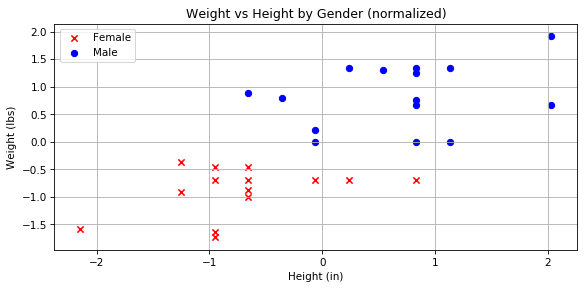

In [25]:
# formatting the plot grid, scales, and figure size
plt.figure(figsize=(9, 4), dpi= 75)
# plt.axis([min_x,max_x,min_y,max_y])
plt.grid()
for i in range(len(data_array)):
    value_n = data_array[i]
    # assign labels values to specific matrix elements
    gender_n = value_n[2]
    height_n = value_n[0]
    weight_n = value_n[1]
    an = plt.scatter(height_n[gender_n==0.0],weight_n[gender_n==0.0], marker = 'x', c= 'r', label = 'Female')
    bn = plt.scatter(height_n[gender_n==1.0],weight_n[gender_n==1.0], marker = 'o', c= 'b', label = 'Male')    
    # plot values, title, legend, x and y axis
    plt.title('Weight vs Height by Gender (normalized)')
    plt.xlabel('Height (in)')
    plt.ylabel('Weight (lbs)')
    plt.legend(handles=[an,bn])

# Setting up the activation function with sigmoid

![alt text](CH0322.png "Title")

## Activation Function defines the output given the set of inputs 
### 1 ReLu
### 2 Tanh
### 3 Step

In [26]:
def sigmoid(input):
    return 1/(1+np.exp(-input))

In [27]:
X = np.arange(-10,10,1)
Y = sigmoid(X)

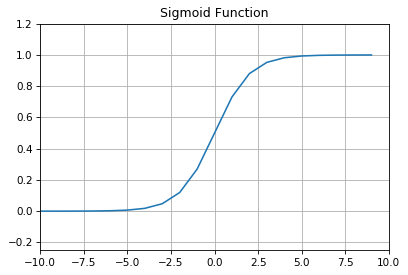

In [28]:
plt.figure(figsize=(6, 4), dpi= 75)
plt.axis([-10,10,-0.25,1.2])
plt.grid()
plt.plot(X,Y)
plt.title('Sigmoid Function')
plt.show()

### We also need the derivative of the sigmoid function
### -------------------------------------------------------------


![alt text](CH0324.png "Title")
![alt text](sld015.gif "Title")

In [29]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1-sigmoid(x))

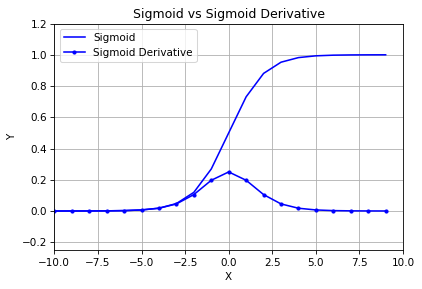

In [30]:
plt.figure(figsize=(6, 4), dpi= 75)
plt.axis([-10,10,-0.25,1.2])
plt.grid()
X = np.arange(-10,10,1)
Y = sigmoid(X)
Y_Prime = sigmoid_derivative(X)
plt.plot(X, Y, label="Sigmoid",c='b')
plt.plot(X, Y_Prime, marker=".", label="Sigmoid Derivative", c='b')
plt.title('Sigmoid vs Sigmoid Derivative')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Calculating the cost function in a neural network

### This is where most of the calculus will come into play

## -----------------------------------------------------------
## We have a cost function which we will evaluate as 
## cost = difference ^ 2
## difference = actual gender - predicted gender
## z summation = Height * w1 + Weight * w2 + b
## predicted gender = sigmoid(z summation)
## -----------------------------------------------------------

### Let's do a prediction at the moment to see how well we would do with the current weights and bias

### (Hint....the predictions will not go very well)

In [31]:
for i in range(100):
    random_index = np.random.randint(len(data_array))
    point = data_array[random_index]
    print(i, point[2])
    z_sigmoid = w1*point[0]+w2*point[1]+b
    print(sigmoid(z_sigmoid))
    

0 1.0
0.498091889594
1 0.0
0.289666468557
2 0.0
0.352959431103
3 1.0
0.488247669768
4 1.0
0.473025591611
5 0.0
0.328704351707
6 1.0
0.319521244392
7 0.0
0.331795165312
8 0.0
0.328704351707
9 0.0
0.34229886078
10 1.0
0.488247669768
11 0.0
0.367008645821
12 1.0
0.37471664594
13 0.0
0.331795165312
14 1.0
0.332924315766
15 0.0
0.29624488754
16 1.0
0.477461283725
17 1.0
0.473025591611
18 1.0
0.37471664594
19 0.0
0.309929914798
20 1.0
0.497457800311
21 1.0
0.332924315766
22 1.0
0.497457800311
23 0.0
0.34229886078
24 1.0
0.48443801193
25 0.0
0.34229886078
26 0.0
0.352959431103
27 0.0
0.328704351707
28 0.0
0.34229886078
29 0.0
0.265227399104
30 1.0
0.400342140267
31 1.0
0.350932867332
32 1.0
0.408298646719
33 0.0
0.24849677073
34 0.0
0.24849677073
35 1.0
0.498091889594
36 1.0
0.350932867332
37 0.0
0.34229886078
38 1.0
0.332924315766
39 1.0
0.319521244392
40 0.0
0.30237368881
41 1.0
0.473025591611
42 1.0
0.332924315766
43 1.0
0.498091889594
44 0.0
0.289666468557
45 0.0
0.240517636911
46 0.0
0.3

In [32]:
z = 0.53418393 * w1 + 1.29693375 * w2 + b
z

-0.007632477636890012

In [33]:
sigmoid(z)

0.49809188985380293

In [34]:
cost_function_test = np.square(1-sigmoid(z))
cost_function_test

0.2519117510305271

## Why does our prediction currently suck??
## Our cost function is pretty high because our weights and bias are totally random
## Let's change that by minimizing our cost function by tweaking the following 
## W1, W2, and b

In [35]:
learning_rate = 0.1

all_costs = []

for i in range(100000):
    # set the random data points that will be used to calculate the summation
    random_number = np.random.randint(len(data_array))
    random_person = data_array[random_number]
    
    # the height and weight from the random individual are selected
    height = random_person[0]
    weight = random_person[1]

    z = w1*height+w2*weight+b
    predictedGender = sigmoid(z)
    
    actualGender = random_person[2]
    
    cost = (predictedGender-actualGender)**2
    
    # the cost value is appended to the list
    all_costs.append(cost)
    
    # partial derivatives of the cost function and summation are calculated
    dcost_predictedGender = 2 * (predictedGender-actualGender)
    dpredictedGenger_dz = sigmoid_derivative(z)
    dz_dw1 = height
    dz_dw2 = weight
    dz_db = 1
    
    dcost_dw1 = dcost_predictedGender * dpredictedGenger_dz * dz_dw1
    dcost_dw2 = dcost_predictedGender * dpredictedGenger_dz * dz_dw2
    dcost_db  = dcost_predictedGender * dpredictedGenger_dz * dz_db
    
    # gradient descent calculation
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b  = b  - learning_rate * dcost_db

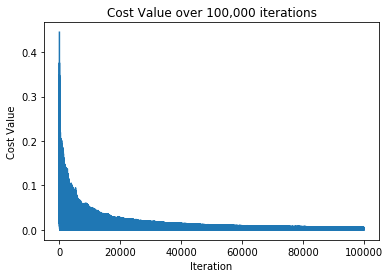

In [36]:
plt.plot(all_costs)
plt.title('Cost Value over 100,000 iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost Value')
plt.show()

In [37]:
print('The final values of w1, w2, and b')
print('---------------------------------')
print('w1 = {}'.format(w1))
print('w2 = {}'.format(w2))
print('b  = {}'.format(b))

The final values of w1, w2, and b
---------------------------------
w1 = 1.8209212481467738
w2 = 10.501412686537124
b  = 2.6922206902934818


In [38]:
for i in range(len(data_array)):
    random_individual = data_array[i]
    height = random_individual[0]
    weight = random_individual[1]
    z = height*w1 + weight*w2 + b
    predictedGender=sigmoid(z)
    print("Individual #{} actual score: {} predicted score: {}"
          .format(i+1,random_individual[2],predictedGender))

Individual #1 actual score: 1.0 predicted score: 0.9921049600550155
Individual #2 actual score: 0.0 predicted score: 0.03372805542036423
Individual #3 actual score: 0.0 predicted score: 0.016372819700798374
Individual #4 actual score: 1.0 predicted score: 0.9999862828839244
Individual #5 actual score: 0.0 predicted score: 0.04694562034974156
Individual #6 actual score: 1.0 predicted score: 0.9999999688535043
Individual #7 actual score: 0.0 predicted score: 0.0004915890916453382
Individual #8 actual score: 1.0 predicted score: 0.9999999999972711
Individual #9 actual score: 0.0 predicted score: 1.6712931344961645e-08
Individual #10 actual score: 0.0 predicted score: 0.00010349306890725037
Individual #11 actual score: 1.0 predicted score: 0.9999999709268494
Individual #12 actual score: 1.0 predicted score: 0.9835862381176147
Individual #13 actual score: 1.0 predicted score: 0.999999966632299
Individual #14 actual score: 0.0 predicted score: 0.00011877876719320243
Individual #15 actual sco

# Predicting gender based on height and weight

In [39]:
def input_normalize(height, weight):
    inputHeight = (height - x_mean[0])/x_std[0]
    inputWeight = (weight - x_mean[1])/x_std[1]
    return inputHeight, inputWeight

In [40]:
score = input_normalize(70, 180)

In [41]:
def predict_gender(raw_score):
    gender_summation = raw_score[0]*w1 + raw_score[1]*w2 + b
    gender_score = sigmoid(gender_summation)
    if gender_score <= 0.5:
        gender = 'Female'
    else:
        gender = 'Male'
    return gender, gender_score

In [42]:
predict_gender(score)

('Male', 0.99999999894375113)

In [43]:
score = input_normalize(50, 159)

In [44]:
predict_gender(score)

('Female', 0.46850306766819977)